In [102]:
!curl -L -o updated-resume-dataset.zip https://www.kaggle.com/api/v1/datasets/download/jillanisofttech/updated-resume-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  382k  100  382k    0     0  1154k      0 --:--:-- --:--:-- --:--:-- 3162k


Some useful regex for cleaning

In [103]:
import re
text = "http://mystuff hello there        w \n          é, à, ö, ñ 漢 (Chinese), こんにちは (Japanese), به متنی(Persian)"

# clean links
text = re.sub(r"http\S+", " ", text)
# remove all non ascii
text = re.sub(r"[^\x00-\x7f]", " ", text)
# remove extra whitespace
text = re.sub(r"\s+", " ", text)

print(text)

 hello there w , , , (Chinese), (Japanese), (Persian)


Train a knn model on a resume dataset from resume to job designation. Use what you learned in knn_sms. 

1. Read data
2. Check data
3. Clean data
4. Transform data
5. Fit model with data
6. Interpret findings with wordcloud (optional)
7. Make it predict on pdf resumes

In [104]:
# reading in data
import pandas as pd
data = pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [105]:
data.shape

(962, 2)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Category'])
data.head()

,Category,Resume,Label
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6


In [108]:
data.isnull().sum()

Category    0
Resume      0
Label       0
dtype: int64

In [109]:
# check for duplicated resumes
data["Resume"].duplicated().sum()

np.int64(796)

In [110]:
# drop duplicated values
data.drop_duplicates(keep='first', inplace=True)

In [111]:
data.shape

(166, 3)

In [112]:
# natural language tooklit for NLP
import nltk


In [113]:
nltk.download('stopwords')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/havishboda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/havishboda/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [114]:
# used to get 'stem' of words
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [115]:
# transform text into keywords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # keep only alpha numeric
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    # remove unimportant stop words like "the" or "to"
    text = [word for word in text if word not in stopwords]
    # only get the stem "eating" -> eat
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [116]:
# test on first resume
transform_text(data['Resume'][0])

'skill program languag python panda numpi scipi matplotlib sql java machin learn regress svm bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch plotli kibana matplotlib ggplot tableau other regular express html css angular 6 logstash kafka python flask git docker comput vision open cv understand deep detail data scienc assur associ data scienc assur associ ernst young llp skill detail exprienc 24 month exprienc 24 month exprienc 24 monthscompani detail compani ernst young llp descript fraud investig disput servic assur technolog assist review tar technolog assist review assist acceler review process run analyt gener report core member team help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topic model autom review result reduc labor cost time spent lawyer review

In [117]:
# create a transformed resume column
data['Transformed Resume'] = data['Resume'].apply(transform_text)
data.head()

,Category,Resume,Label,Transformed Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,6,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6,educ detail may 2013 may 2017 data scientist d...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6,area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6,educ detail mca ymcaust faridabad haryana data...


In [118]:
# create word cloud for transformed resume column
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['Transformed Resume']))

In [119]:
sorted(data["Label"].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24)]

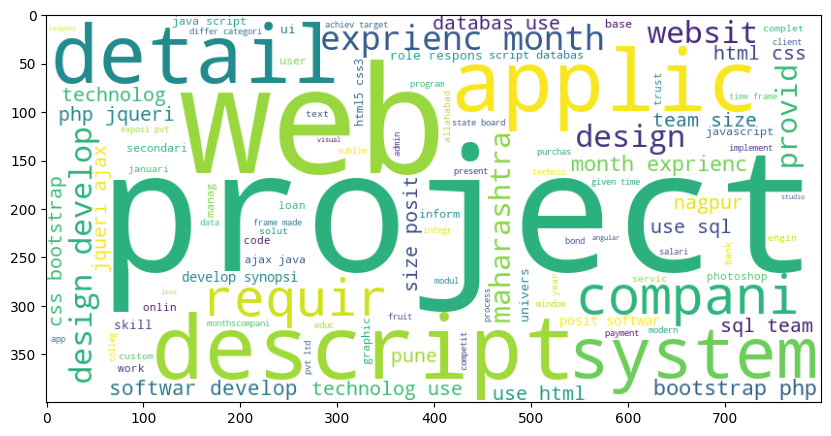

In [120]:
import matplotlib.pyplot as plt
wc0 = wc.generate(' '.join(data[data['Label'] == 24]['Transformed Resume']))
plt.figure(figsize=(10, 6))
plt.imshow(wc0)

MODEL BUILDING

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [123]:
# Using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() # default

In [124]:
X = data["Transformed Resume"]
y = data["Label"]

In [125]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
features = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=2024,
)

# choose highest freq label in neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
# Testing model accuracy

from sklearn.metrics import classification_report

print(f"train accuracy {model.score(X_train, y_train)}")
print(f"test accuracy {model.score(X_test, y_test)}")
print(f"classifying {model}")

pred = model.predict(X_test)
print(classification_report(y_test, pred, zero_division=True))

train accuracy 0.8409090909090909
test accuracy 0.7647058823529411
classifying KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           9       0.00      1.00      0.00         0
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.67      1.00      0.80         2
          16       1.00      0.50      0.67         2
          17       1.00      1.00